In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

In [26]:
df = pd.read_csv("UAS_LAB_Video_Game_Sales.csv")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7107,Tom Clancys Splinter Cell,PC,2003.0,Action,Ubisoft,0.00,0.00,0.00,0.00,0.01,91.0,20.0,8.5,291.0,T
7108,Blacksite: Area 51,PC,2007.0,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.01,60.0,20.0,4.9,42.0,T
7109,Virtua Tennis 2009,PC,2009.0,Sports,Sega,0.00,0.00,0.00,0.00,0.01,68.0,8.0,6.5,19.0,E
7110,CivCity: Rome,PC,2006.0,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.01,67.0,46.0,6.9,32.0,E10+


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7112 non-null   object 
 1   Platform         7112 non-null   object 
 2   Year_of_Release  7112 non-null   float64
 3   Genre            7112 non-null   object 
 4   Publisher        7112 non-null   object 
 5   NA_Sales         7112 non-null   float64
 6   EU_Sales         7112 non-null   float64
 7   JP_Sales         7112 non-null   float64
 8   Other_Sales      7112 non-null   float64
 9   Global_Sales     7112 non-null   float64
 10  Critic_Score     7112 non-null   float64
 11  Critic_Count     7112 non-null   float64
 12  User_Score       7112 non-null   float64
 13  User_Count       7112 non-null   float64
 14  Rating           7112 non-null   object 
dtypes: float64(10), object(5)
memory usage: 833.6+ KB


In [12]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

In [28]:
df['Publisher'].value_counts()

Publisher
Electronic Arts                971
Ubisoft                        516
Activision                     511
Sony Computer Entertainment    324
THQ                            313
                              ... 
Funsta                           1
Havas Interactive                1
Acquire                          1
EA Games                         1
Team Meat                        1
Name: count, Length: 279, dtype: int64

In [30]:
df = df.drop('Publisher', axis=1)

In [29]:
df['Name'].value_counts()

Name
Madden NFL 07                              9
LEGO Star Wars II: The Original Trilogy    8
Need for Speed: Most Wanted                8
Madden NFL 08                              8
Harry Potter and the Goblet of Fire        7
                                          ..
Star Fox: Zero                             1
Headhunter                                 1
Brunswick Pro Bowling                      1
Bratz: Rock Angelz                         1
Super Meat Boy                             1
Name: count, Length: 4524, dtype: int64

In [32]:
df = df.drop('Name', axis=1)

In [33]:
df = pd.get_dummies(df, columns = ['Platform','Genre','Rating'])

In [34]:
df.columns

Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Platform_3DS', 'Platform_DC', 'Platform_DS',
       'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS',
       'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP',
       'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X',
       'Platform_X360', 'Platform_XOne', 'Genre_Action', 'Genre_Adventure',
       'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_AO',
       'Rating_E', 'Rating_E10+', 'Rating_K-A', 'Rating_M', 'Rating_RP',
       'Rating_T'],
      dtype='object')

In [36]:
df_input = df[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Platform_3DS', 'Platform_DC', 'Platform_DS',
       'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS',
       'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP',
       'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X',
       'Platform_X360', 'Platform_XOne', 'Genre_Action', 'Genre_Adventure',
       'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_AO',
       'Rating_E', 'Rating_E10+', 'Rating_K-A', 'Rating_M', 'Rating_RP',
       'Rating_T']]

In [37]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year_of_Release     7112 non-null   float64
 1   NA_Sales            7112 non-null   float64
 2   EU_Sales            7112 non-null   float64
 3   JP_Sales            7112 non-null   float64
 4   Other_Sales         7112 non-null   float64
 5   Global_Sales        7112 non-null   float64
 6   Critic_Score        7112 non-null   float64
 7   Critic_Count        7112 non-null   float64
 8   User_Score          7112 non-null   float64
 9   User_Count          7112 non-null   float64
 10  Platform_3DS        7112 non-null   bool   
 11  Platform_DC         7112 non-null   bool   
 12  Platform_DS         7112 non-null   bool   
 13  Platform_GBA        7112 non-null   bool   
 14  Platform_GC         7112 non-null   bool   
 15  Platform_PC         7112 non-null   bool   
 16  Platfo

Nomor 1B

In [38]:
#1b.
#K-Means Clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [39]:
distortions = []
best_n_clusters = None
best_silhouette_score = -1

K = range(2, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k,  n_init=10)
    cluster_labels = kmeanModel.fit_predict(df_input)

    silhouette_avg = silhouette_score(df_input, cluster_labels)

    print("For n_clusters =", k, "The average silhouette_score is:", silhouette_avg)

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = k

    distortions.append(kmeanModel.inertia_)

print("The best number of clusters is:", best_n_clusters, "with silhouette score:", best_silhouette_score)

For n_clusters = 2 The average silhouette_score is: 0.9358931671367102
For n_clusters = 3 The average silhouette_score is: 0.9027388090613386
For n_clusters = 4 The average silhouette_score is: 0.8684362146948907
For n_clusters = 5 The average silhouette_score is: 0.8349179195304917
For n_clusters = 6 The average silhouette_score is: 0.8151089888219064
For n_clusters = 7 The average silhouette_score is: 0.80068376587296
For n_clusters = 8 The average silhouette_score is: 0.7329926858101021
For n_clusters = 9 The average silhouette_score is: 0.7033297217270171
The best number of clusters is: 2 with silhouette score: 0.9358931671367102


In [40]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df_input)
df['k_means']=kmeanModel.predict(df_input)
df['k_means'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k_means
1    6991
0     121
Name: count, dtype: int64

In [58]:
#1b.
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=19, min_samples=2)
df['DBSCAN'] = dbscan_model.fit_predict(df_input)
df

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T,k_means,DBSCAN
0,2006.0,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,...,False,False,True,False,False,False,False,False,1,-1
1,2008.0,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,...,False,False,True,False,False,False,False,False,1,-1
2,2009.0,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,...,False,False,True,False,False,False,False,False,1,-1
3,2006.0,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,...,False,False,True,False,False,False,False,False,1,-1
4,2006.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,...,False,False,True,False,False,False,False,False,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7107,2003.0,0.00,0.00,0.00,0.00,0.01,91.0,20.0,8.5,291.0,...,False,False,False,False,False,False,False,True,1,0
7108,2007.0,0.00,0.00,0.00,0.00,0.01,60.0,20.0,4.9,42.0,...,False,False,False,False,False,False,False,True,1,0
7109,2009.0,0.00,0.00,0.00,0.00,0.01,68.0,8.0,6.5,19.0,...,False,False,True,False,False,False,False,False,1,0
7110,2006.0,0.00,0.00,0.00,0.00,0.01,67.0,46.0,6.9,32.0,...,True,False,False,True,False,False,False,False,1,0


In [59]:
unique_value_count = df['DBSCAN'].nunique()
print("Number of unique values in 'DBSCAN' column:", unique_value_count)

Number of unique values in 'DBSCAN' column: 51


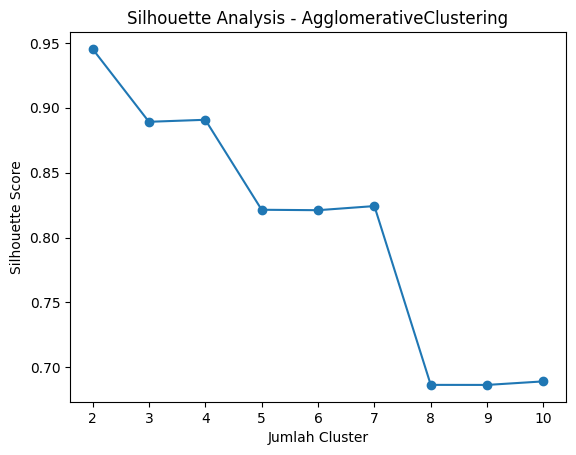

Jumlah Cluster Terbaik (Silhouette): 2


In [60]:
#1b.
#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
silhouette_scores = []
for n_clusters in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglomerative.fit_predict(df_input)
    silhouette_avg = silhouette_score(df_input, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis - AgglomerativeClustering')
plt.show()

# Menemukan jumlah cluster terbaik berdasarkan skor silhouette
best_cluster_index = np.argmax(silhouette_scores)
best_cluster_count = best_cluster_index + 2  # Karena iterasi dimulai dari 2

print(f"Jumlah Cluster Terbaik (Silhouette): {best_cluster_count}")

In [61]:
agglomerative_model = AgglomerativeClustering(n_clusters=2)
df['Hierarchical'] = agglomerative_model.fit_predict(df_input)

Nomor 1C.

In [55]:
#1c.
#K-Means Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df_input)
print('variance coverage: ',pca.explained_variance_ratio_)


variance coverage:  [9.98471764e-01 1.03545899e-03 4.20520505e-04]


In [56]:
new_data_transform_visual=pca.fit_transform(df_input)
new_data_transform_visual=pd.DataFrame(new_data_transform_visual,columns=['Global_Sales','Genre','User_Count'])

new_data_transform_visual['k_means'] = df['k_means']
new_data_transform_visual.shape

(7112, 4)

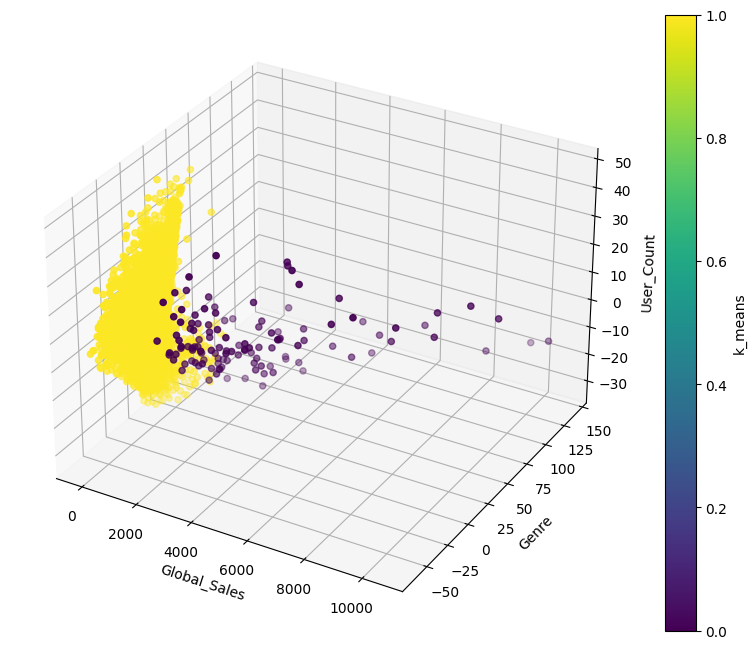

In [57]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(new_data_transform_visual['Global_Sales'], new_data_transform_visual['Genre'], new_data_transform_visual['User_Count'], c=df['k_means'], cmap='viridis')

color_bar = fig.colorbar(scatter, ax=ax)
color_bar.set_label('k_means')

ax.set_xlabel('Global_Sales')
ax.set_ylabel('Genre')
ax.set_zlabel('User_Count')

plt.show()

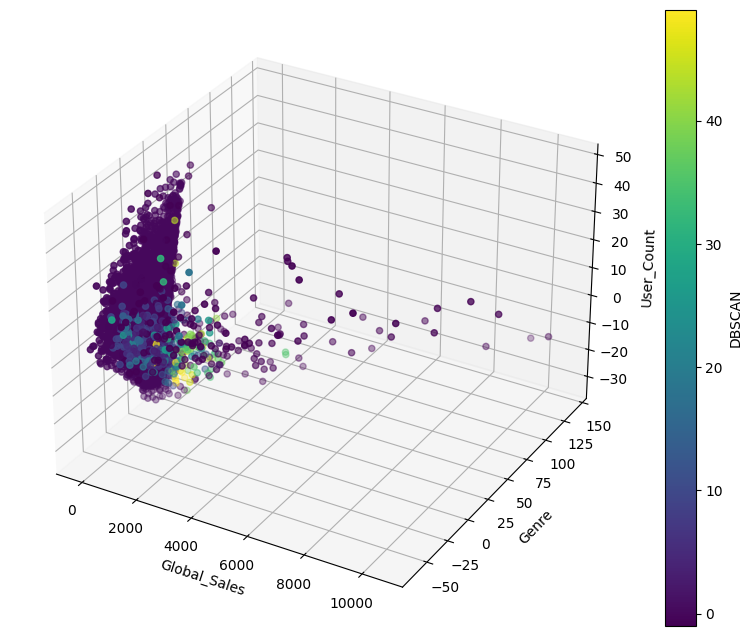

In [64]:
#1c.
#DBSCAN Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(new_data_transform_visual['Global_Sales'], new_data_transform_visual['Genre'], new_data_transform_visual['User_Count'], c=df['DBSCAN'], cmap='viridis')

color_bar = fig.colorbar(scatter, ax=ax)
color_bar.set_label('DBSCAN')

ax.set_xlabel('Global_Sales')
ax.set_ylabel('Genre')
ax.set_zlabel('User_Count')

# Show the plot
plt.show()

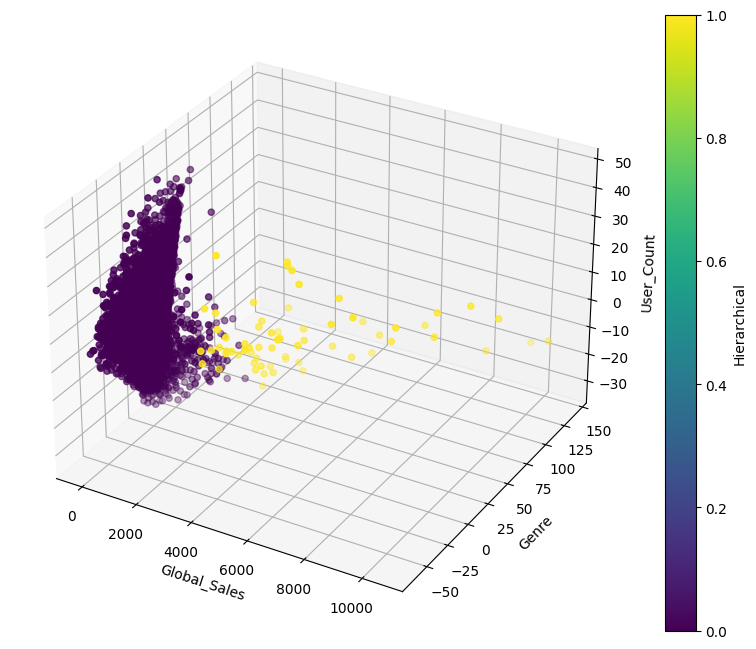

In [68]:
#1c.
#Hierarchical Clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(new_data_transform_visual['Global_Sales'], new_data_transform_visual['Genre'], new_data_transform_visual['User_Count'], c=df['Hierarchical'], cmap='viridis')

color_bar = fig.colorbar(scatter, ax=ax)
color_bar.set_label('Hierarchical')

ax.set_xlabel('Global_Sales')
ax.set_ylabel('Genre')
ax.set_zlabel('User_Count')

plt.show()

Visualization Tambahan

In [78]:
import plotly.express as px
fig = px.scatter_3d(new_data_transform_visual, x='Global_Sales', y='Genre', z='User_Count',
              color='k_means')
fig.show()

In [79]:
new_data_transform_visual['DBSCAN'] = df['DBSCAN']
new_data_transform_visual.head()
fig = px.scatter_3d(new_data_transform_visual, x='Global_Sales', y='Genre', z='User_Count',
              color='DBSCAN')
fig.show()

In [80]:
new_data_transform_visual['Hierarchical'] = df['Hierarchical']
new_data_transform_visual
fig = px.scatter_3d(new_data_transform_visual, x='Global_Sales', y='Genre', z='User_Count',
              color='Hierarchical')
fig.show()